# Import Basics of Code

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Loading datasets

In [22]:
items_df = pd.read_csv('../datasets/items.csv')
users_df = pd.read_csv('../datasets/users.csv')

In [23]:
items_df.head()

,product_id,categories,colors,materials,design_styles,usages,genders
0,1,پوشاک و اکسسوری,فلزی,پارچه,فانتزی و خاص,دکور,زنانه
1,2,لوازم سفر و گردشگری,فلزی,پارچه,مدرن,شخصی,مردانه
2,3,الکترونیک,خنثی,خاص,لوکس و رسمی,شخصی,مردانه
3,4,ورزش و تناسب اندام,روشن و شاد,خاص,کلاسیک,شخصی,مردانه
4,5,الکترونیک,خنثی,چوبی,کلاسیک,سرگرمی,زنانه


In [24]:
users_df.head()


,user_id,age,gender,category_1,category_2,category_3,psychological_traits,favorite_material,favorite_design,occasions,relationship
0,1,47,مرد,الکترونیک,لوازم سفر و گردشگری,خانه و دکور,برون گرا,خاص,لوکس و رسمی,تولد,همسر
1,2,17,مرد,ورزش و تناسب اندام,پازل ها و بازی ها,خانه و دکور,منطقی و تحلیل گر,ترکیبی,کلاسیک,سالگرد,خانواده
2,3,4,مرد,زیبایی و بهداشت,الکترونیک,الکترونیک,ماجراجو و ورزشکار,فلزات,هنری,جشن فارغ التحصیلی,آشنا
3,4,9,زن,خانه و دکور,لوازم سفر و گردشگری,پوشاک و اکسسوری,برون گرا,خاص,مدرن,تولد,افراد خاص
4,5,29,مرد,الکترونیک,خانه و دکور,لوازم سفر و گردشگری,منطقی و تحلیل گر,چوبی,مدرن,عروسی,خانواده


In [25]:
items_df = items_df.drop(columns = ["product_id"])

In [26]:
items_df.describe()

,categories,colors,materials,design_styles,usages,genders
count,150,150,150,150,150,150
unique,8,7,7,7,7,3
top,الکترونیک,خنثی,پارچه,کلاسیک,شخصی,مردانه
freq,60,48,46,58,74,90


In [27]:
users_df = users_df.drop(columns = ['user_id'])

In [28]:
def manual_user_encoder(df):
    categories_dict = {
        "category_1": {v: i for i, v in enumerate(["الکترونیک", "پوشاک و اکسسوری", "خانه و دکور", "زیبایی و بهداشت", "ورزش و تناسب اندام", "کتاب و محصولات آموزشی", "پازل ها و بازی ها", "لوازم سفر و گردشگری"])},
        "category_2": {v: i for i, v in enumerate(["الکترونیک", "پوشاک و اکسسوری", "خانه و دکور", "زیبایی و بهداشت", "ورزش و تناسب اندام", "کتاب و محصولات آموزشی", "پازل ها و بازی ها", "لوازم سفر و گردشگری"])},
        "category_3": {v: i for i, v in enumerate(["الکترونیک", "پوشاک و اکسسوری", "خانه و دکور", "زیبایی و بهداشت", "ورزش و تناسب اندام", "کتاب و محصولات آموزشی", "پازل ها و بازی ها", "لوازم سفر و گردشگری"])},
        "gender": {v: i for i, v in enumerate(["مرد", "زن"])},
        "psychological_traits": {v: i for i, v in enumerate(["برون گرا", "درون گرا", "خلاق و هنری", "منطقی و تحلیل گر", "احساسی و حمایتی", "ماجراجو و ورزشکار", "لوکس گرا و شیک"])},
        "favorite_material": {v: i for i, v in enumerate(["پارچه", "فلزات", "پلاستیک", "چوبی", "شیشه و سرامیک", "ترکیبی", "خاص"])},
        "favorite_design": {v: i for i, v in enumerate(["کلاسیک", "مدرن", "هنری", "لوکس و رسمی", "طبیعت محور", "منطقه ای", "فانتزی و خاص"])},
        "occasions": {v: i for i, v in enumerate(["تولد", "عروسی", "جشن فارغ التحصیلی", "سالگرد", "ارتقا کاری", "مناسبت فردی", "دیگر"])},
        "relationship": {v: i for i, v in enumerate(["دوست", "خانواده", "همکار", "آشنا", "همسر", "پارتنر", "افراد خاص"])}
    }

    for col in df.columns:
        if col in categories_dict:
            df[col] = df[col].apply(lambda x: categories_dict[col].get(x, -1))
    return df

users_df = manual_user_encoder(users_df)

In [29]:
def manual_product_encoder(df):
    categories_dict = {
        "categories": {v: i for i, v in enumerate(["الکترونیک", "پوشاک و اکسسوری", "خانه و دکور", "زیبایی و بهداشت", "ورزش و تناسب اندام", "کتاب و محصولات آموزشی", "پازل ها و بازی ها", "لوازم سفر و گردشگری"])},
        "colors": {v: i for i, v in enumerate(["خنثی", "اصلی", "ثانویه", "طبیعی", "روشن و شاد", "فلزی", "تیره و لوکس"])},
        "materials": {v: i for i, v in enumerate(["پارچه", "فلزات", "پلاستیک", "چوبی", "شیشه و سرامیک", "ترکیبی", "خاص"])},
        "design_styles": {v: i for i, v in enumerate(["کلاسیک", "مدرن", "هنری", "لوکس و رسمی", "طبیعت محور", "منطقه ای", "فانتزی و خاص"])},
        "usages": {v: i for i, v in enumerate(["شخصی", "دکور", "تکنولوژی", "سرگرمی", "تناسب اندام", "کاری", "سلامت"])},
        "genders": {v: i for i, v in enumerate(["مردانه", "زنانه", "خنثی"])}
    }

    for col in df.columns:
        if col in categories_dict:
            df[col] = df[col].apply(lambda x: categories_dict[col].get(x, -1))
    return df

items_df = manual_product_encoder(items_df)
items_df

,categories,colors,materials,design_styles,usages,genders
0,1,5,0,6,1,1
1,7,5,0,1,0,0
2,0,0,6,3,0,0
3,4,4,6,0,0,0
4,0,0,3,0,3,1
...,...,...,...,...,...,...
145,4,3,0,3,0,1
146,3,0,2,1,0,1
147,2,5,3,4,0,0
148,3,0,3,0,0,0


In [30]:
users_df.head()

,age,gender,category_1,category_2,category_3,psychological_traits,favorite_material,favorite_design,occasions,relationship
0,47,0,0,7,2,0,6,3,0,4
1,17,0,4,6,2,3,5,0,3,1
2,4,0,3,0,0,5,1,2,2,3
3,9,1,2,7,1,0,6,1,0,6
4,29,0,0,2,7,3,3,1,1,1


# Model Architecture

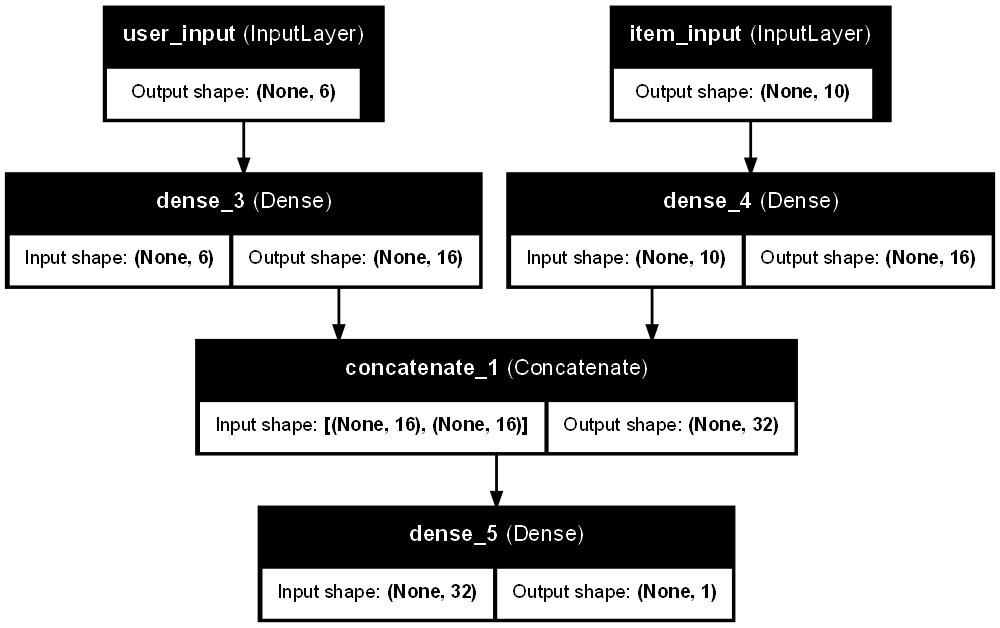

In [31]:
input_user = layers.Input(shape = (6,), name = "user_input")
input_item = layers.Input(shape = (10,), name = "item_input")

user_dense = layers.Dense(16, activation = 'relu')(input_user)

items_dense = layers.Dense(16, activation='relu')(input_item)

merged = layers.concatenate([user_dense, items_dense])
out = layers.Dense(1, activation = 'sigmoid')(merged)

model = keras.Model(inputs = [input_user, input_item], outputs = out)

keras.utils.plot_model(model, show_shapes = True, show_layer_names = True, dpi = 100)

In [32]:
y = np.random.choice([0, 1], size=users_df.shape[0] * items_df.shape[0], p = [0.5,0.5])
y.reshape(-1, 1)
users_df_expanded = users_df.loc[users_df.index.repeat(items_df.shape[0])].reset_index(drop = True)
items_df_expanded = pd.concat([items_df] * users_df.shape[0], ignore_index = True)
y = pd.DataFrame(y)


In [33]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit([items_df_expanded,users_df_expanded], y, epochs = 2, batch_size=8)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 614us/step - accuracy: 0.4747 - loss: 1.4340
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.5015 - loss: 0.7123


In [34]:
#User Random Prediction
age = np.random.randint(1, 71)
gender = np.random.randint(0, 2)
category1 = np.random.randint(0, 8)
category2 = np.random.randint(0, 8)
category3 = np.random.randint(0, 8)
mental = np.random.randint(0, 7)
material = np.random.randint(0, 7)
design = np.random.randint(0, 7)
occasion = np.random.randint(0, 7)
relationship = np.random.randint(0, 7)

sample_user = np.concatenate(([age], [gender], [category1], [category2], [category3],
                               [mental], [material], [design], [occasion], [relationship]))
# Items Random Prediction
category = np.random.randint(0, 8)
color = np.random.randint(0, 7)
material = np.random.randint(0, 7)
design = np.random.randint(0, 7)
use_ = np.random.randint(0, 7)
gender = np.random.randint(0, 3)

sample_item = np.concatenate(([category], [color], [material], [design], [use_], [gender]))

sample_user = sample_user.reshape(1, 10)
sample_item = sample_item.reshape(1, 6)
print(sample_user)
print(sample_item)
prediction = model.predict([sample_item, sample_user])
print(prediction)

[[11  0  5  6  0  5  2  6  5  2]]
[[4 6 5 5 6 1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.5673066]]


In [35]:
model.save("./best_model.keras")

In [36]:
users_df_expanded.head()

,age,gender,category_1,category_2,category_3,psychological_traits,favorite_material,favorite_design,occasions,relationship
0,47,0,0,7,2,0,6,3,0,4
1,47,0,0,7,2,0,6,3,0,4
2,47,0,0,7,2,0,6,3,0,4
3,47,0,0,7,2,0,6,3,0,4
4,47,0,0,7,2,0,6,3,0,4


In [37]:
items_df_expanded.head()

,categories,colors,materials,design_styles,usages,genders
0,1,5,0,6,1,1
1,7,5,0,1,0,0
2,0,0,6,3,0,0
3,4,4,6,0,0,0
4,0,0,3,0,3,1
